In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from astropy.table import Table, vstack
from read_yse_ztf_snana import read_YSE_ZTF_snana_dir as snana
import pandas as pd
from astropy.io import ascii 
import os

In [2]:
full_snid_list, full_meta_list, full_df_list = snana(dir_name = 'thesis_sample')

In [3]:
for object in full_meta_list:
    print(f"{object['object_id']} has RA = {object['ra']}, DEC = {object['dec']}, and redshift z = {object['redshift']}")
    print(f"{object['object_id']} is in the galaxy {object['host_gal_name']}, identified using {object['host_gal_name_source']}")

2020hgw has RA = 214.579712, DEC = 38.929525, and redshift z = 0.043
2020hgw is in the galaxy WISEA J141819.08+385545.6, identified using (NED)
2020jfo has RA = 185.460337, DEC = 4.481695, and redshift z = 0.005
2020jfo is in the galaxy MESSIER 061, identified using (NED)
2020jww has RA = 242.714942, DEC = 27.161696, and redshift z = 0.046
2020jww is in the galaxy WISEA J161051.52+270930.0, identified using (NED)
2020rth has RA = 52.113556, DEC = -5.254542, and redshift z = 0.0184
2020rth is in the galaxy KUG 0325-054, identified using (NED)
2020tly has RA = 7.360825, DEC = 17.485344, and redshift z = 0.058
2020tly is in the galaxy MCG +03-02-014, identified using (NED)


In [4]:
for object in full_meta_list:
    redshifts = object['redshift']
    print(object['object_id'], redshifts)

2020hgw 0.043
2020jfo 0.005
2020jww 0.046
2020rth 0.0184
2020tly 0.058


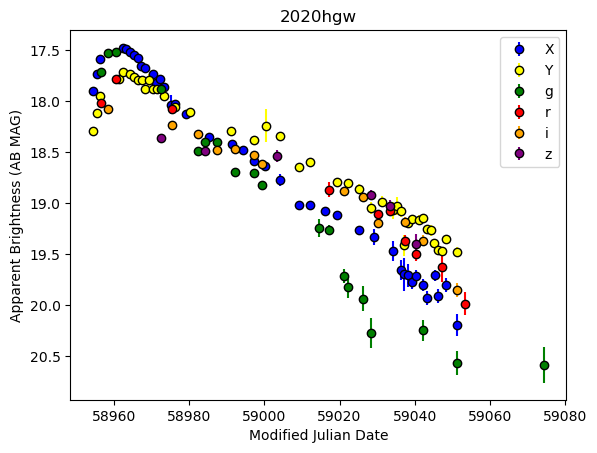

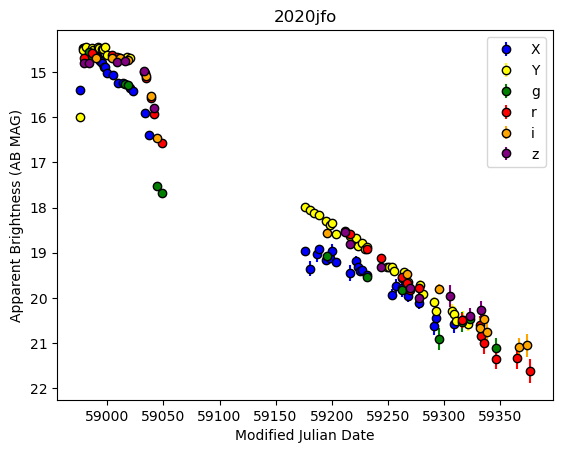

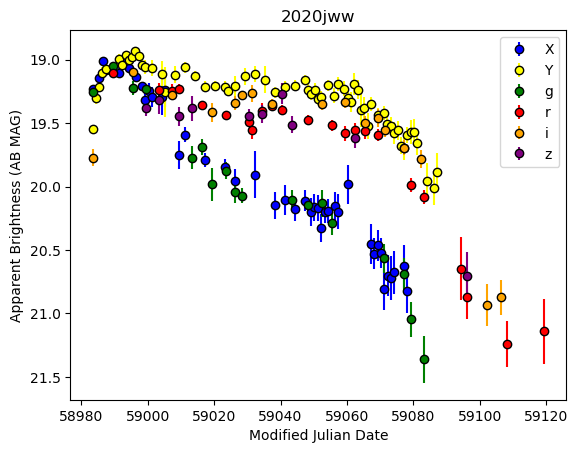

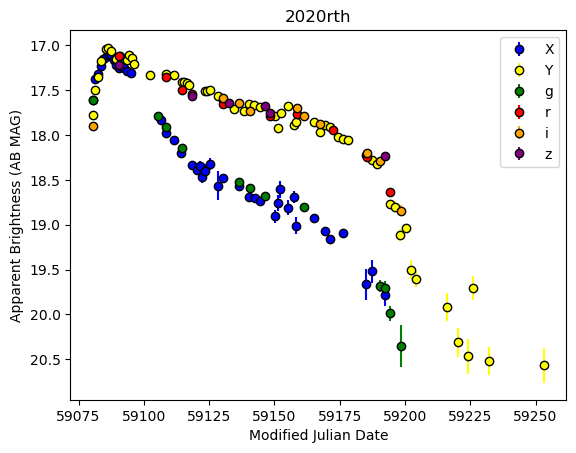

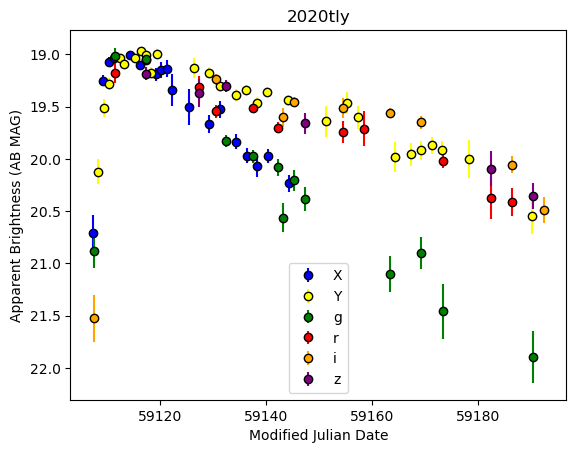

In [5]:
for idx, df in enumerate(full_df_list):
        plt.figure(idx)
        colors = {'X':'blue', 'Y':'yellow', 'g':'green', 'r':'red', 'i':'orange', 'z':'purple'}
        PAN = {}
        ZTF = {}
        for i, filt in enumerate(['X', 'Y']):
            mask = df['PASSBAND'] == filt
            upperlim = df['MAGERR'] < .2
            mask = mask & upperlim
            l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
            ZTF[filt] = l
        for i, filt in enumerate(['g', 'r', 'i', 'z']):
            mask = df['PASSBAND'] == filt
            upperlim = df['MAGERR'] < .2
            l = plt.errorbar(df[mask]['MJD'], df[mask]['MAG'], yerr = df[mask]['MAGERR'], fmt = 'o', markeredgecolor = 'k', label = str(filt), color = colors[filt])
            PAN[filt] = l
        plt.gca().invert_yaxis()
        plt.title(full_snid_list[idx])
        plt.xlabel('Modified Julian Date')
        plt.ylabel('Apparent Brightness (AB MAG)')
        plt.legend()
  

In [6]:
def spectra_plot(filepath):
    files = os.listdir(os.getcwd())
    csv_files = []
    for file in files:
        if ".csv" in file:
            csv_files.append(file)
    objects = {}
    for file in csv_files:
        if "2020jfo" in file:
            continue
        object_name = file.split('-')[0]
        if object_name in objects:
            objects[object_name].append(file)
        else:
            objects[object_name] = [file]
    for object_name, csv_files in objects.items():
        plt.figure()
        for file in csv_files:
            data = ascii.read(file, format = "csv", header_start = 18, data_start = 19)
            wavelength = data['wavelength']
            flux = data['flux']
            plt.plot(wavelength, flux / np.median(flux), label = file[:-4])
        plt.legend()
        plt.xlabel(r'Wavelength ($\AA$)')
        plt.ylabel(r'Normalized flux $(erg \ s^{-1} \ cm^{-2} \ \AA)$')
        plt.title(object_name)

In [7]:
def extrabol_inputs(object, df):
    filter_svos = {'g':'PAN-STARRS/PS1.g', 'r':'PAN-STARRS/PS1.r', 'i':'PAN-STARRS/PS1.i', 'z':'PAN-STARRS/PS1.z','X':'Palomar/ZTF.g', 'Y':'Palomar/ZTF.r'}
    for idx, df in enumerate(full_df_list):
        df = df.rename(columns = {'PASSBAND':'FLT_SVO_ID'})
        df['FLT_SVO_ID'] = df['FLT_SVO_ID'].map(filter_svos)
        df.drop(['FLUX', 'FLUXERR', 'PHOTFLAG'], axis=1, inplace=True)
        df.insert(4, 'MAG TYPE', 'AB')
        df = df[['MJD', 'MAG', 'MAGERR', 'FLT_SVO_ID', 'MAG TYPE']]
        # filename = full_snid_list[idx] + '.dat' 
        # df.to_csv(filename, sep = ' ', header=False, index=False)
        print(df)



In [8]:
extrabol_inputs(full_snid_list, full_df_list)

           MJD     MAG  MAGERR        FLT_SVO_ID MAG TYPE
0    58954.397  17.895   0.018     Palomar/ZTF.g       AB
1    58954.454  18.292   0.029     Palomar/ZTF.r       AB
2    58955.380  17.733   0.014     Palomar/ZTF.g       AB
3    58955.426  18.111   0.022     Palomar/ZTF.r       AB
4    58956.327  17.947   0.017     Palomar/ZTF.r       AB
..         ...     ...     ...               ...      ...
126  59051.197  19.480   0.052     Palomar/ZTF.r       AB
127  59051.280  19.853   0.070  PAN-STARRS/PS1.i       AB
128  59051.280  20.571   0.116  PAN-STARRS/PS1.g       AB
129  59053.280  19.986   0.116  PAN-STARRS/PS1.r       AB
130  59074.270  20.587   0.177  PAN-STARRS/PS1.g       AB

[131 rows x 5 columns]
           MJD     MAG  MAGERR        FLT_SVO_ID MAG TYPE
0    58975.202  15.991   0.009     Palomar/ZTF.r       AB
1    58975.250  15.404   0.006     Palomar/ZTF.g       AB
2    58978.192  14.465   0.003     Palomar/ZTF.g       AB
3    58978.248  14.505   0.003     Palomar/ZTF.r